## DS4002 Project 1 - ChatGPT Sentiment Analysis
This script file contains the code used to analyze user sentiment and experiences across different app versions within the Google Play Store's ChatGPT app. Please follow the steps below to execute the scripts:

* Download the dataset from: https://github.com/rithwikraman/DS4002-Project1/blob/main/DATA/GPT_reviews.csv
* Download the LDA result dataset from: https://github.com/rithwikraman/DS4002-Project1/blob/main/DATA/Review_groups_output.csv
* Upload both datasets to your Google Colab Runtime Environment
* Update .read_csv() to the location of your GPT_reviews.csv dataset
* Run the scripts until cell 19.
* Once you reach the LDA analysis portion within the script (Cell 19), update the read_csv() to the location of your Review_groups_output.csv
* Run the Jupyter Notebook and view the results



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
reviews_data = pd.read_csv("/content/GPT_reviews.csv")
reviews_data.head()

,Name,Rating,Comment,Date,Country,Thumbs Up,Review ID,App Version
0,Musa Maan,4,pictures information is not good but overall best,2024-07-18 18:19:22,us,0,4312ea55-28b5-4abd-b007-c0c4909c25bc,1.2024.192
1,Lorax,5,Very useful,2024-07-18 18:18:15,us,0,249e38e0-9d3a-4392-896d-88fd7e4499f6,NaN
2,Ramesh Singh,5,This app is very good for students who are str...,2024-07-18 18:18:00,us,0,d1ad5cbb-29c1-468b-8e00-31d82f4ee943,1.2024.192
3,Gurjaap Singh,3,limited chats😤,2024-07-18 18:15:15,us,0,6142e817-ac9a-4beb-aa8b-6ed8a273ed82,1.2024.157
4,Riya Sharma,3,i like this app very muchh ❤️❤️❤️,2024-07-18 18:11:52,us,0,10f2a957-df4c-4a2a-b71d-a5dfb54e2ed3,1.2024.192


In [ ]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Name         100000 non-null  object
 1   Rating       100000 non-null  int64 
 2   Comment      100000 non-null  object
 3   Date         100000 non-null  object
 4   Country      100000 non-null  object
 5   Thumbs Up    100000 non-null  int64 
 6   Review ID    100000 non-null  object
 7   App Version  93268 non-null   object
dtypes: int64(2), object(6)
memory usage: 6.1+ MB


In [ ]:
reviews_data_cleaned = reviews_data.dropna()
reviews_data_cleaned = reviews_data_cleaned.reset_index(drop=True)

In [ ]:
reviews_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93268 entries, 0 to 93267
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         93268 non-null  object
 1   Rating       93268 non-null  int64 
 2   Comment      93268 non-null  object
 3   Date         93268 non-null  object
 4   Country      93268 non-null  object
 5   Thumbs Up    93268 non-null  int64 
 6   Review ID    93268 non-null  object
 7   App Version  93268 non-null  object
dtypes: int64(2), object(6)
memory usage: 5.7+ MB


In [ ]:
rating_count = reviews_data_cleaned['Rating'].count()
print(rating_count)

93268


In [ ]:
app_versions = reviews_data_cleaned['App Version'].value_counts()
filtered_app_versions = app_versions[app_versions > 3500]
print(len(filtered_app_versions))
print(filtered_app_versions)

filtered_app_version_list = []
for item, count in app_versions.items():
    if count > 3500:
        filtered_app_version_list.append(item)

main_df = reviews_data_cleaned[reviews_data_cleaned['App Version'].isin(filtered_app_version_list)]
print(main_df.info())

12
App Version
1.2024.073    6692
1.2024.131    5699
1.2024.080    5442
1.2024.170    5232
1.2024.177    4764
1.2024.087    4110
1.2023.314    3890
1.2024.157    3803
1.2023.352    3761
1.2024.122    3645
1.2024.101    3640
1.2024.143    3597
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 54275 entries, 2 to 92155
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         54275 non-null  object
 1   Rating       54275 non-null  int64 
 2   Comment      54275 non-null  object
 3   Date         54275 non-null  object
 4   Country      54275 non-null  object
 5   Thumbs Up    54275 non-null  int64 
 6   Review ID    54275 non-null  object
 7   App Version  54275 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.7+ MB
None


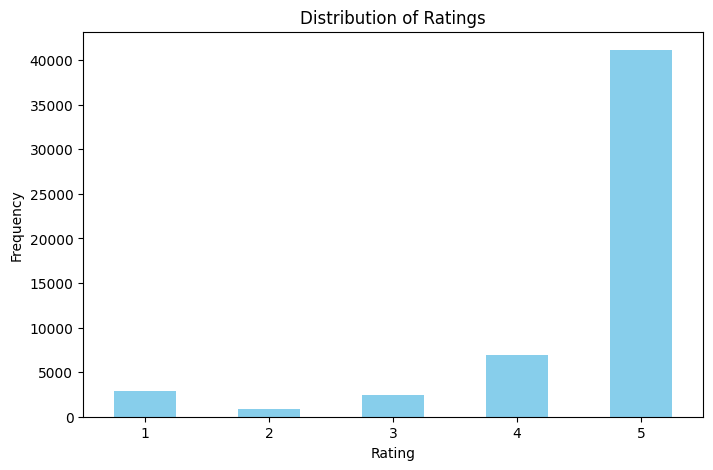

In [ ]:
plt.figure(figsize=(8, 5))
main_df['Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

12
<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 14228 to 84327
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         12 non-null     object
 1   Rating       12 non-null     int64 
 2   Comment      12 non-null     object
 3   Date         12 non-null     object
 4   Country      12 non-null     object
 5   Thumbs Up    12 non-null     int64 
 6   Review ID    12 non-null     object
 7   App Version  12 non-null     object
dtypes: int64(2), object(6)
memory usage: 864.0+ bytes


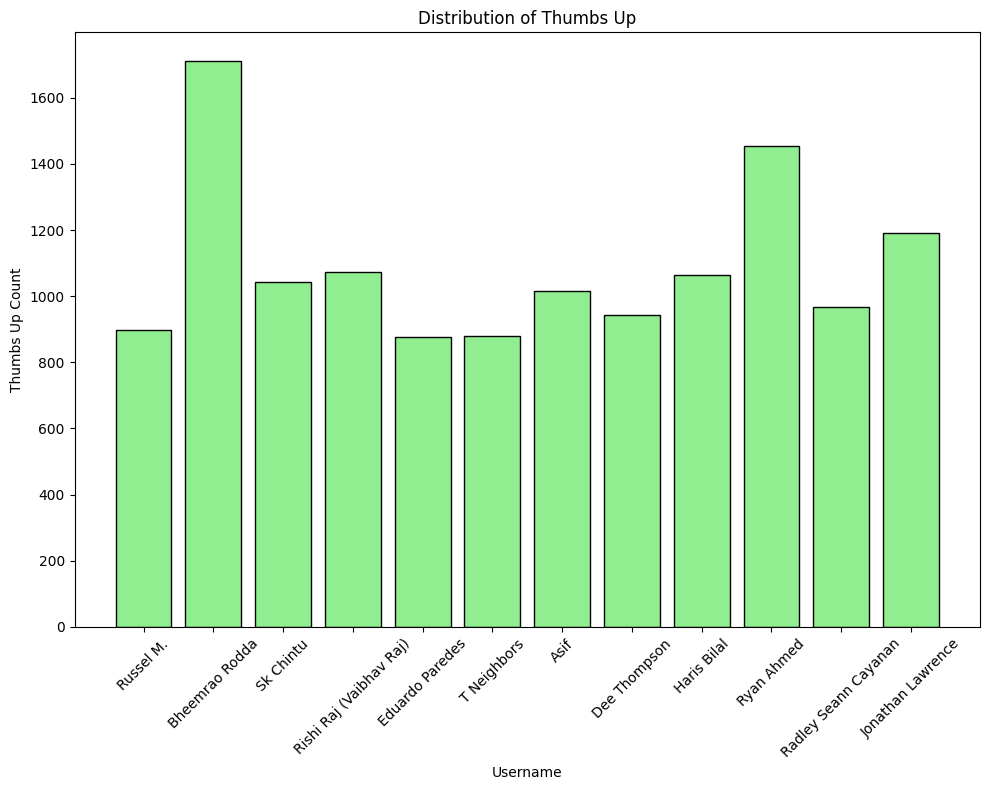

In [ ]:
thumbs_up = reviews_data_cleaned[reviews_data_cleaned['Thumbs Up'] > 750]
print(len(thumbs_up))
thumbs_up.info()

plt.figure(figsize=(10, 8))
plt.bar(thumbs_up['Name'], thumbs_up['Thumbs Up'], color='lightgreen', edgecolor='black')
plt.title('Distribution of Thumbs Up')
plt.xlabel('Username')
plt.ylabel('Thumbs Up Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

App Version
1.2023.314    4.612853
1.2023.352    4.516884
1.2024.073    4.552451
1.2024.080    4.544653
1.2024.087    4.551582
1.2024.101    4.555220
1.2024.122    4.512483
1.2024.131    4.478680
1.2024.143    4.417292
1.2024.157    4.469892
1.2024.170    4.522554
1.2024.177    4.510495
Name: Rating, dtype: float64


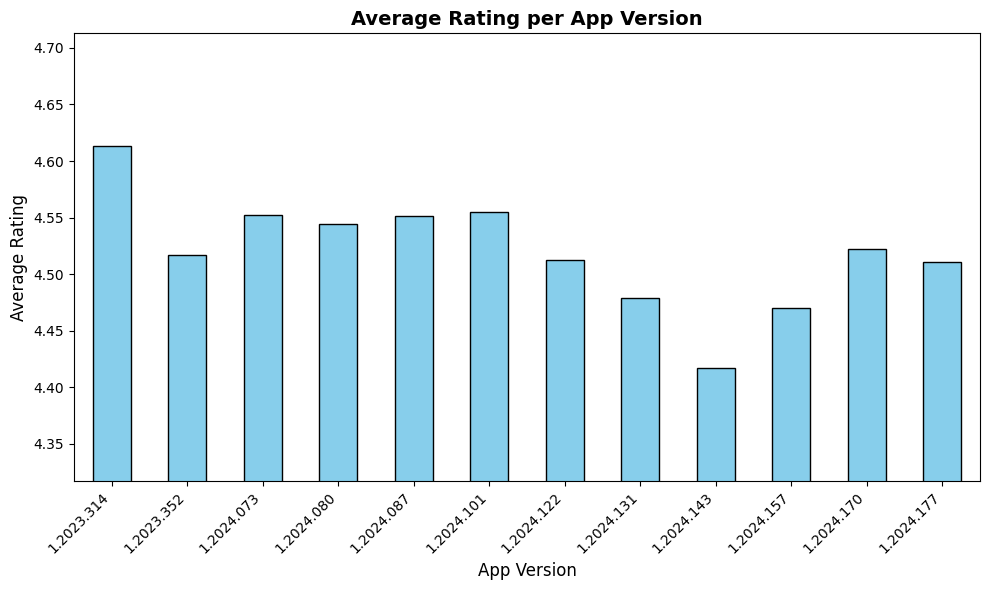

In [ ]:
average_rating_per_app_version = main_df.groupby('App Version')['Rating'].mean()
print(average_rating_per_app_version)

plt.figure(figsize=(10, 6))
average_rating_per_app_version.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Rating per App Version', fontsize=14, fontweight='bold')
plt.xlabel('App Version', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

min_rating = average_rating_per_app_version.min() - 0.1
max_rating = average_rating_per_app_version.max() + 0.1
plt.ylim(min_rating, max_rating)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

App Version
1.2023.314    4203
1.2023.352    4699
1.2024.073    3155
1.2024.080    2400
1.2024.087    1267
1.2024.101    1220
1.2024.122    3315
1.2024.131    3048
1.2024.143    4271
1.2024.157    3975
1.2024.170    2623
1.2024.177    1651
Name: Thumbs Up, dtype: int64


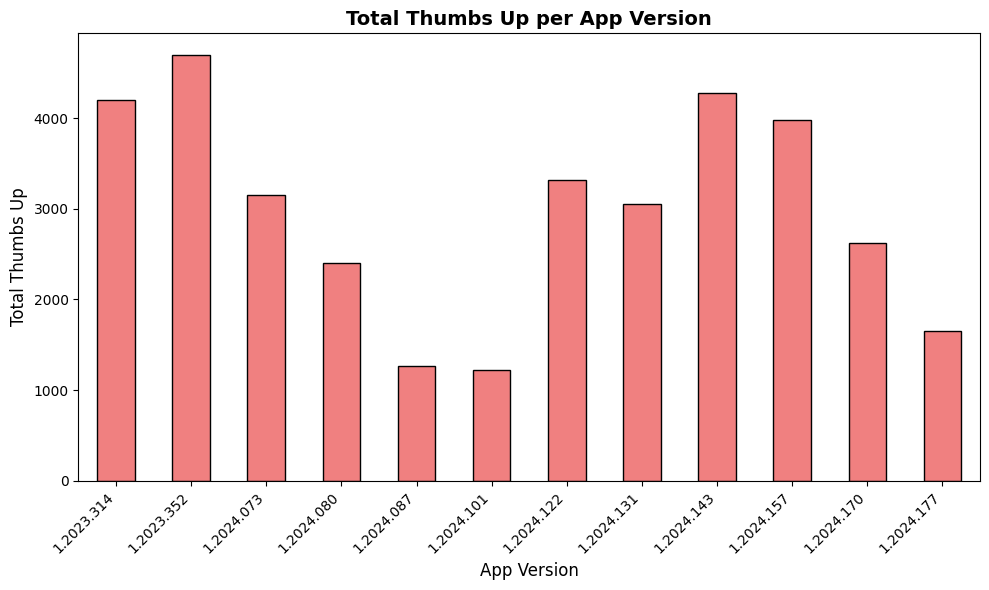

In [ ]:
total_thumbs_up_per_app_version = main_df.groupby('App Version')['Thumbs Up'].sum()
print(total_thumbs_up_per_app_version)

plt.figure(figsize=(10, 6))
total_thumbs_up_per_app_version.plot(kind='bar', color='lightcoral', edgecolor='black')

plt.title('Total Thumbs Up per App Version', fontsize=14, fontweight='bold')
plt.xlabel('App Version', fontsize=12)
plt.ylabel('Total Thumbs Up', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
nltk.download('vader_lexicon')

s_analyzer = SentimentIntensityAnalyzer()
main_df['Sentiment Score'] = main_df['Comment'].apply(lambda x: s_analyzer.polarity_scores(x))
main_df['Compound Score'] = main_df['Sentiment Score'].apply(lambda x: x['compound'])

main_df.info()
print(main_df['Sentiment Score'].head())



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


<class 'pandas.core.frame.DataFrame'>
Index: 54275 entries, 2 to 92155
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             54275 non-null  object 
 1   Rating           54275 non-null  int64  
 2   Comment          54275 non-null  object 
 3   Date             54275 non-null  object 
 4   Country          54275 non-null  object 
 5   Thumbs Up        54275 non-null  int64  
 6   Review ID        54275 non-null  object 
 7   App Version      54275 non-null  object 
 8   Sentiment Score  54275 non-null  object 
 9   Compound Score   54275 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 4.6+ MB
2     {'neg': 0.655, 'neu': 0.345, 'pos': 0.0, 'comp...
5     {'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'comp...
8     {'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'comp...
9     {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...
10    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Na

<ipython-input-12-a510141cafb7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['Sentiment Score'] = main_df['Comment'].apply(lambda x: s_analyzer.polarity_scores(x))
<ipython-input-12-a510141cafb7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['Compound Score'] = main_df['Sentiment Score'].apply(lambda x: x['compound'])


In [ ]:
def assign_sentiment(compound_score):
    if compound_score >= 0.33:
        return 'Positive'
    elif compound_score <= -0.33:
        return 'Negative'
    else:
        return 'Neutral'

main_df['Sentiment'] = main_df['Compound Score'].apply(assign_sentiment)
print(main_df['Sentiment'].head(10))
print(main_df['Sentiment'].value_counts())




2      Neutral
5     Positive
8     Positive
9     Positive
10     Neutral
11     Neutral
21    Positive
22    Positive
24    Positive
28    Positive
Name: Sentiment, dtype: object
Sentiment
Positive    40177
Neutral     12046
Negative     2052
Name: count, dtype: int64


<ipython-input-13-aac945c36065>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['Sentiment'] = main_df['Compound Score'].apply(assign_sentiment)


In [ ]:
# Sentiment Analysis
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words.add('app')
stop_words.add('application')

def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text)
    words = text.lower().split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

main_df['Preprocessed Comment'] = main_df['Comment'].apply(preprocess_text)
print(main_df['Preprocessed Comment'].head())

# Create the vector database
vectorizer = CountVectorizer()
comment_vectors = vectorizer.fit_transform(main_df['Preprocessed Comment'])

# LDA
num_topics = 20
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(comment_vectors)

# Assign Topics
topic_distributions = lda.transform(comment_vectors)
main_df['Topic'] = topic_distributions.argmax(axis=1)

# Get top words per topic
num_top_words = 5
def extract_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
        print(f"Topic #{topic_idx}: {', '.join(top_words)}")

feature_names = vectorizer.get_feature_names_out()
extract_top_words(lda, feature_names, num_top_words)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-14-872dbd87aa4a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['Preprocessed Comment'] = main_df['Comment'].apply(preprocess_text)


2                                         limited chats
5     good helpful online audios videos facility may...
8                             amazing website ever seen
9                                       best daily life
10        rating based ground braking law assistant tec
Name: Preprocessed Comment, dtype: object
Topic #0: questions, world, answers, satisfied, answering
Topic #1: free, version, even, without, features
Topic #2: great, excellent, hai, work, tool
Topic #3: answer, give, question, ask, get
Topic #4: much, thank, thanks, chatgpt, helping
Topic #5: best, ever, ai, one, used
Topic #6: helps, lot, time, help, many
Topic #7: chat, gpt, full, help, day
Topic #8: amazing, use, awesome, easy, absolutely
Topic #9: voice, working, feature, add, option
Topic #10: useful, incredible, students, effective, de
Topic #11: fast, accurate, information, learning, outstanding
Topic #12: ai, like, wow, assistant, super
Topic #13: love, nice, need, image, chatgpt
Topic #14: sometimes, t

<ipython-input-14-872dbd87aa4a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['Topic'] = topic_distributions.argmax(axis=1)


In [ ]:
print(main_df.head())

                Name  Rating  \
2      Gurjaap Singh       3   
5   MUHAMMAD ZAVIYAN       3   
8        Mike Ekberg       5   
9    jolly varughese       5   
10   Tobela Ngonyoti       5   

                                              Comment                 Date  \
2                                      limited chats😤  2024-07-18 18:15:15   
5   very good and helpful. online Audios and video...  2024-07-18 18:09:30   
8     this is the most amazing website I've ever seen  2024-07-18 18:03:34   
9                             best for a daily Life 🙃  2024-07-18 17:59:56   
10  my rating is based on what to me is ground bra...  2024-07-18 17:59:13   

   Country  Thumbs Up                             Review ID App Version  \
2       us          0  6142e817-ac9a-4beb-aa8b-6ed8a273ed82  1.2024.157   
5       us          0  b6264662-bcc0-4690-a48e-6d0930370825  1.2024.177   
8       us          0  3f29fc53-bda3-4a67-b9d4-e688dc3cb206  1.2024.177   
9       us          0  005f2709-bea2-4

In [ ]:
groups_df = pd.DataFrame(main_df)

# Define the topic group mapping
topic_group_mapping = {
    # Group 1: Positive Sentiment and Satisfaction
    0: {'group': 1, 'keywords': 'questions, world, answers, satisfied, answering'},
    2: {'group': 1, 'keywords': 'great, excellent, hai, work, tool'},
    4: {'group': 1, 'keywords': 'much, thank, thanks, chatgpt, helping'},
    8: {'group': 1, 'keywords': 'amazing, use, awesome, easy, absolutely'},
    15: {'group': 1, 'keywords': 'good, students, really, apps, pretty'},
    18: {'group': 1, 'keywords': 'perfect, wonderful, really, download, superb'},

    # Group 2: AI and ChatGPT Features
    1: {'group': 2, 'keywords': 'free, version, even, without, features'},
    5: {'group': 2, 'keywords': 'best, ever, ai, one, used'},
    9: {'group': 2, 'keywords': 'voice, working, feature, add, option'},
    11: {'group': 2, 'keywords': 'fast, accurate, information, learning, outstanding'},
    12: {'group': 2, 'keywords': 'ai, like, wow, assistant, super'},
    13: {'group': 2, 'keywords': 'love, nice, need, image, chatgpt'},
    17: {'group': 2, 'keywords': 'chatgpt, like, responses, also, conversation'},

    # Group 3: Helpfulness and Problem Solving
    3: {'group': 3, 'keywords': 'answer, give, question, ask, get'},
    10: {'group': 3, 'keywords': 'useful, incredible, students, effective, de'},
    16: {'group': 3, 'keywords': 'better, google, friend, well, fantastic'},
    19: {'group': 3, 'keywords': 'helpful, really, experience, mind, friendly'},

    # Group 4: Ease of Use and Learning
    6: {'group': 4, 'keywords': 'helps, lot, time, help, many'},
    7: {'group': 4, 'keywords': 'chat, gpt, full, help, day'},
    14: {'group': 4, 'keywords': 'sometimes, try, please, wrong, problem'},
}

# Add Group and Keywords columns to the DataFrame
groups_df['Group'] = groups_df['Topic'].map(lambda x: topic_group_mapping[x]['group'])
groups_df['Keywords'] = groups_df['Topic'].map(lambda x: topic_group_mapping[x]['keywords'])

group_descriptions = {
    1: "Positive Sentiment and Satisfaction",
    2: "AI and ChatGPT-Specific Features",
    3: "Helpfulness and Problem Solving",
    4: "Ease of Use and Learning",
}

# Add 'description' to each entry in the topic_group_mapping
for topic, info in topic_group_mapping.items():
    group_number = info['group']
    info['description'] = group_descriptions[group_number]

# Now, topic_group_mapping includes the group description as well
print(groups_df.head())

                Name  Rating  \
2      Gurjaap Singh       3   
5   MUHAMMAD ZAVIYAN       3   
8        Mike Ekberg       5   
9    jolly varughese       5   
10   Tobela Ngonyoti       5   

                                              Comment                 Date  \
2                                      limited chats😤  2024-07-18 18:15:15   
5   very good and helpful. online Audios and video...  2024-07-18 18:09:30   
8     this is the most amazing website I've ever seen  2024-07-18 18:03:34   
9                             best for a daily Life 🙃  2024-07-18 17:59:56   
10  my rating is based on what to me is ground bra...  2024-07-18 17:59:13   

   Country  Thumbs Up                             Review ID App Version  \
2       us          0  6142e817-ac9a-4beb-aa8b-6ed8a273ed82  1.2024.157   
5       us          0  b6264662-bcc0-4690-a48e-6d0930370825  1.2024.177   
8       us          0  3f29fc53-bda3-4a67-b9d4-e688dc3cb206  1.2024.177   
9       us          0  005f2709-bea2-4

In [ ]:
groups_df.to_csv('Review_groups_output.csv', index=False)
from google.colab import files
files.download('Review_groups_output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

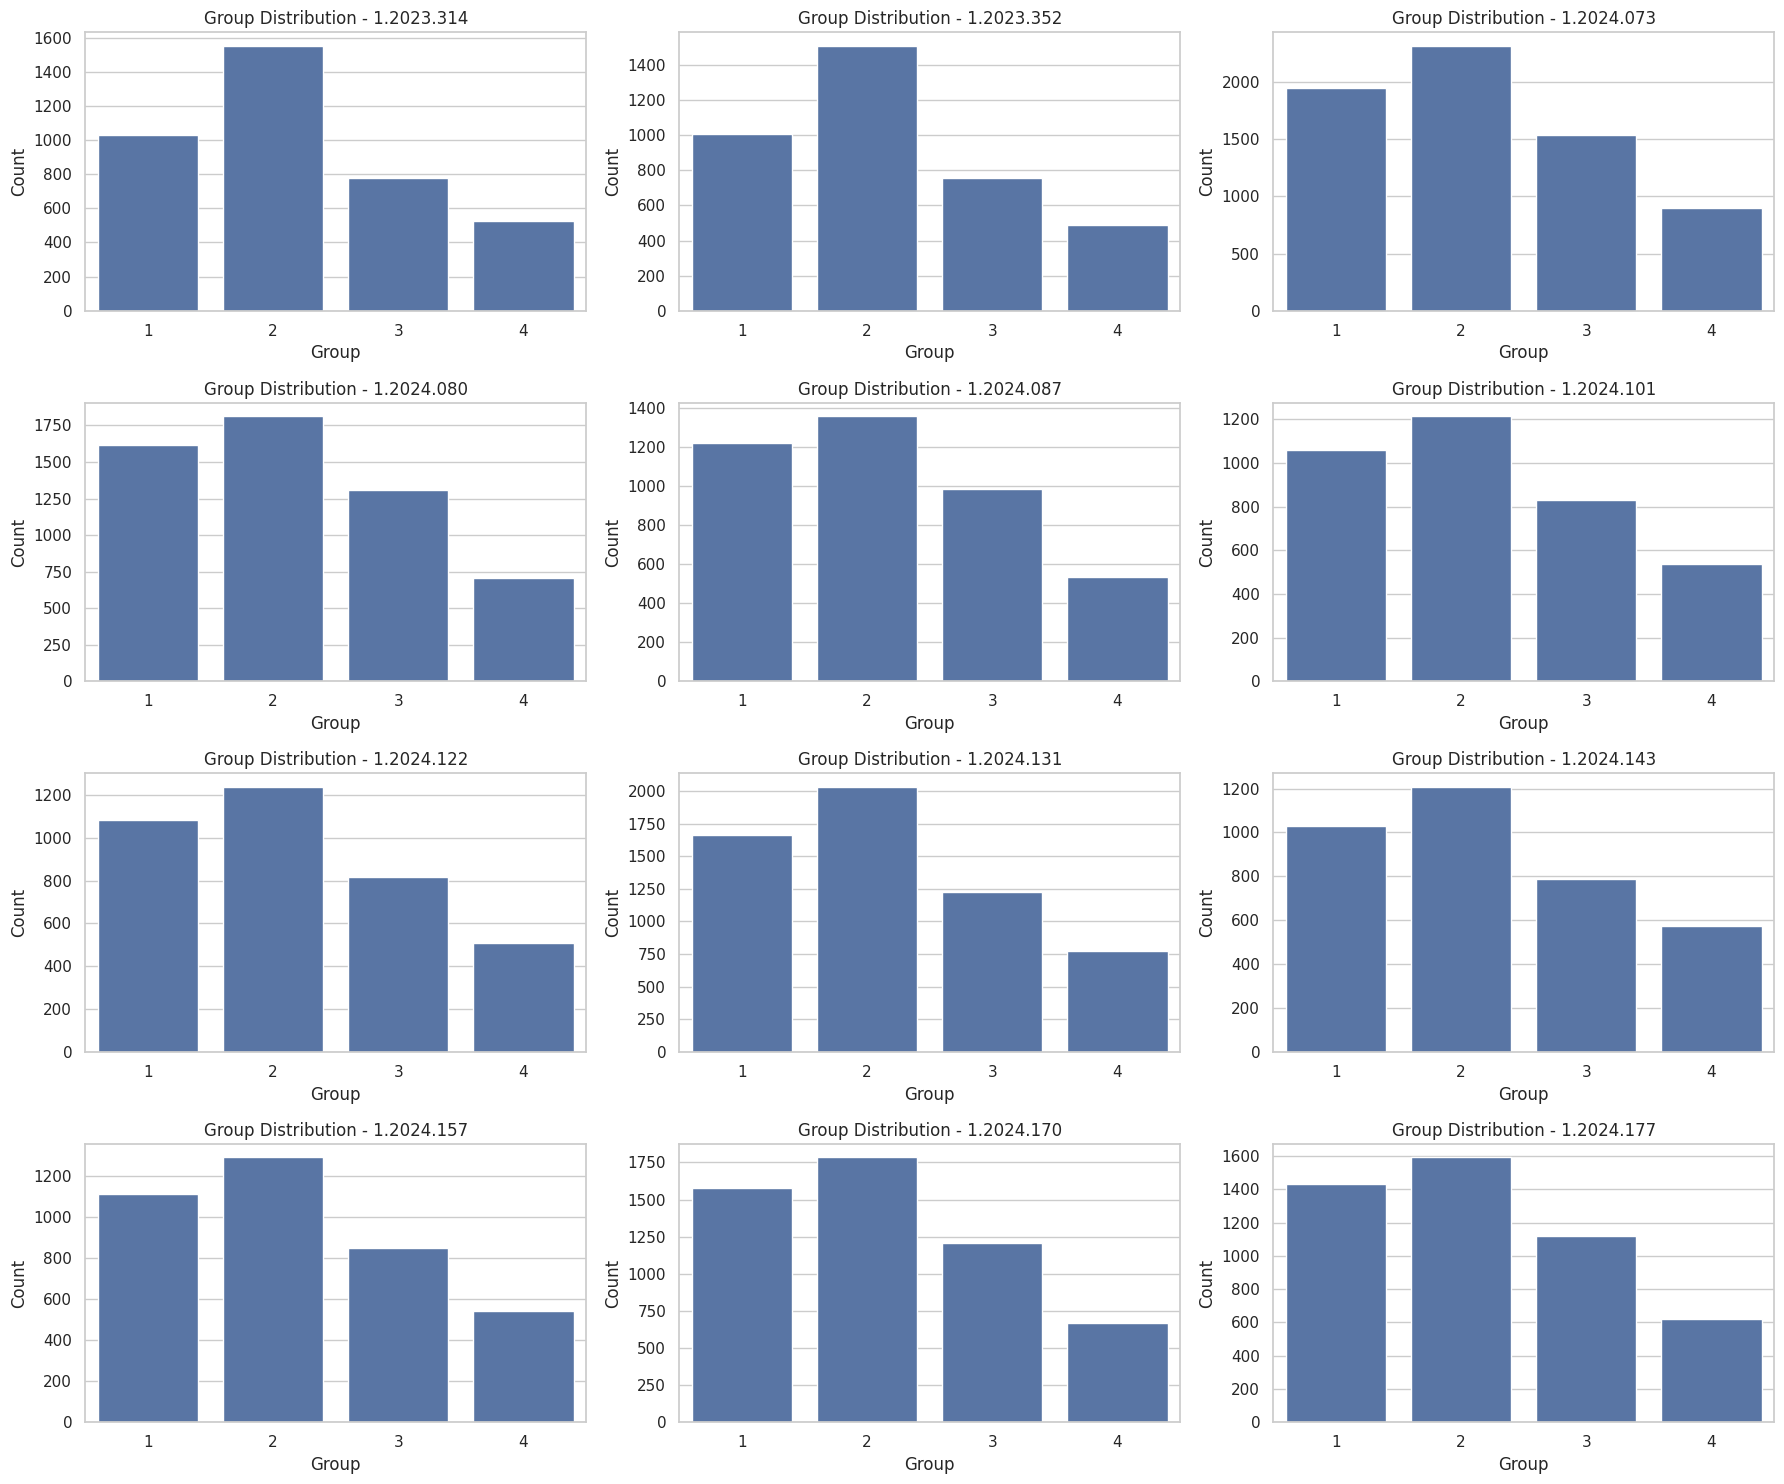

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 15))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each group as a mini bar plot
for ax, (version, version_data) in zip(axes, groups_df.groupby('App Version')):
    # Count occurrences of each group
    group_counts = version_data['Group'].value_counts().sort_index()

    # Create a mini bar plot
    sns.barplot(x=group_counts.index, y=group_counts.values, ax=ax)

    # Set titles and labels
    ax.set_title(f'Group Distribution - {version}')
    ax.set_xlabel('Group')
    ax.set_ylabel('Count')
    ax.set_xticks(group_counts.index-1)

# Remove any empty subplots (if there are less than 6 app versions)
for i in range(len(groups_df['App Version'].unique()), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
review_groups_output = pd.read_csv("Review_groups_output.csv")
review_groups_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54275 entries, 0 to 54274
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  54275 non-null  object 
 1   Rating                54275 non-null  int64  
 2   Comment               54275 non-null  object 
 3   Date                  54275 non-null  object 
 4   Country               54275 non-null  object 
 5   Thumbs Up             54275 non-null  int64  
 6   Review ID             54275 non-null  object 
 7   App Version           54275 non-null  object 
 8   Sentiment Score       54275 non-null  object 
 9   Compound Score        54275 non-null  float64
 10  Sentiment             54275 non-null  object 
 11  Preprocessed Comment  54195 non-null  object 
 12  Topic                 54275 non-null  int64  
 13  Group                 54275 non-null  int64  
 14  Keywords              54275 non-null  object 
dtypes: float64(1), int6

In [ ]:
import pandas as pd

# Count the number of reviews for each app version and their associated sentiments
app_version_sentiment_count = review_groups_output.groupby(['App Version', 'Sentiment']).size().unstack(fill_value=0)
print(app_version_sentiment_count)


Sentiment    Negative  Neutral  Positive
App Version                             
1.2023.314        149      850      2891
1.2023.352        155      871      2735
1.2024.073        226     1521      4945
1.2024.080        206     1177      4059
1.2024.087        126      865      3119
1.2024.101        126      753      2761
1.2024.122        138      823      2684
1.2024.131        220     1391      4088
1.2024.143        174      829      2594
1.2024.157        149      835      2819
1.2024.170        195     1115      3922
1.2024.177        188     1016      3560


In [ ]:
# Calculate the proportion of each sentiment category for the different app versions
sentiment_proportion = app_version_sentiment_count.div(app_version_sentiment_count.sum(axis=1), axis=0)
print(sentiment_proportion)

Sentiment    Negative   Neutral  Positive
App Version                              
1.2023.314   0.038303  0.218509  0.743188
1.2023.352   0.041212  0.231587  0.727200
1.2024.073   0.033772  0.227286  0.738942
1.2024.080   0.037854  0.216281  0.745865
1.2024.087   0.030657  0.210462  0.758881
1.2024.101   0.034615  0.206868  0.758516
1.2024.122   0.037860  0.225789  0.736351
1.2024.131   0.038603  0.244078  0.717319
1.2024.143   0.048374  0.230470  0.721157
1.2024.157   0.039180  0.219564  0.741257
1.2024.170   0.037271  0.213112  0.749618
1.2024.177   0.039463  0.213266  0.747271


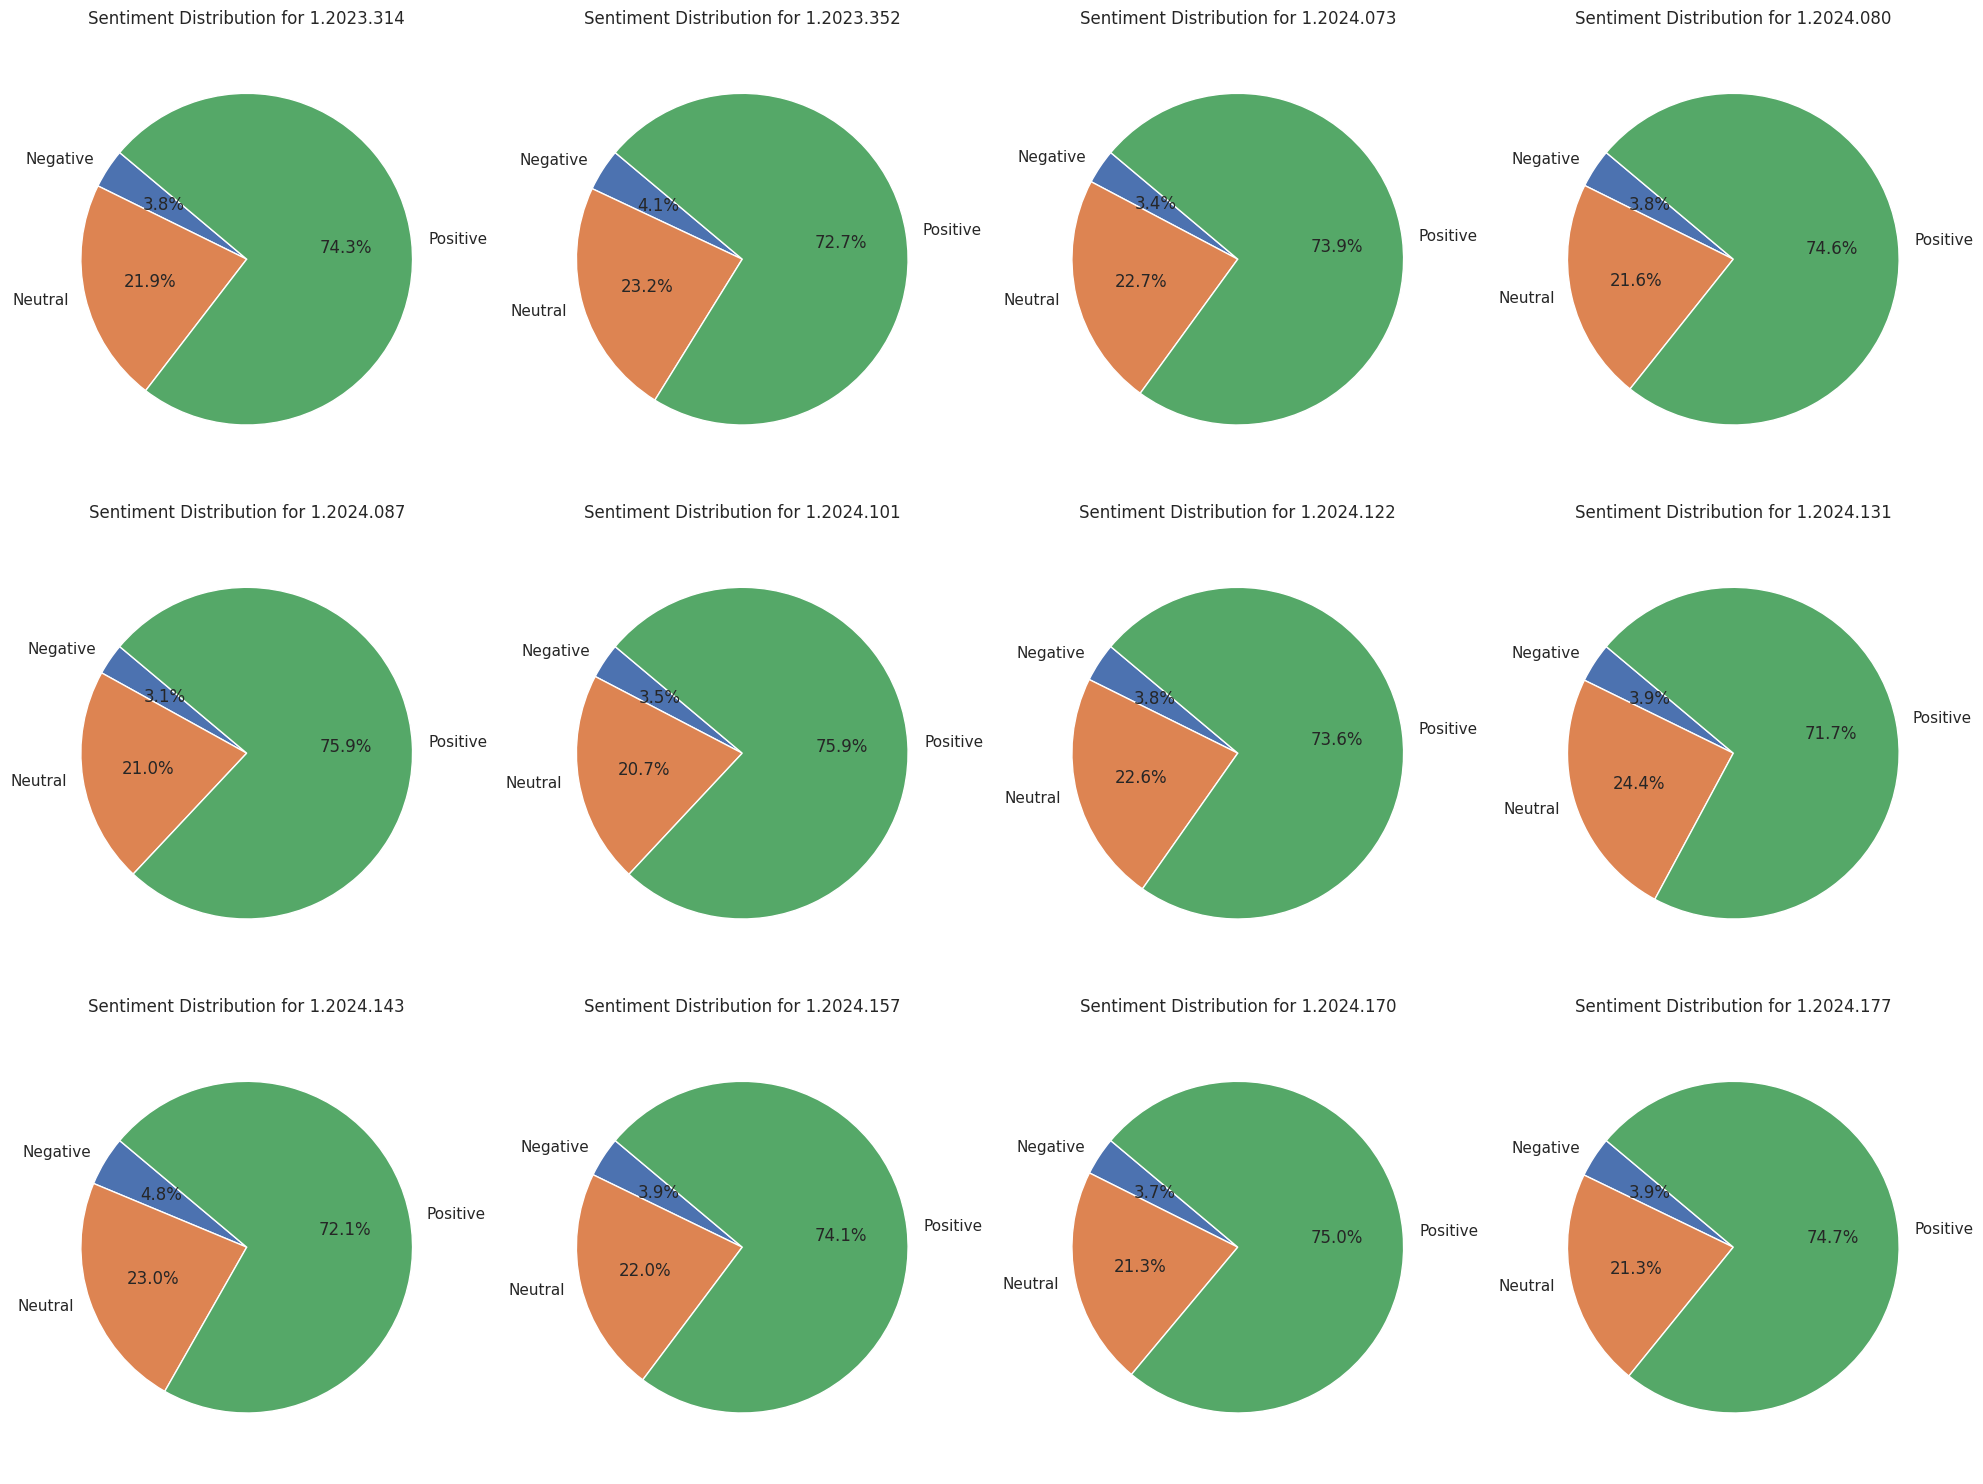

In [ ]:
import matplotlib.pyplot as plt

# Number of app versions
num_versions = sentiment_proportion.shape[0]

# Calculate the number of rows needed for the grid
num_rows = (num_versions + 3) // 4  # Ceiling division to determine rows

# Create a figure and axes for the subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))  # Adjust height based on the number of rows
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Create pie charts for each app version
for idx, app_version in enumerate(sentiment_proportion.index):
    axes[idx].pie(sentiment_proportion.loc[app_version],
                   labels=sentiment_proportion.columns,
                   autopct='%1.1f%%',
                   startangle=140)
    axes[idx].set_title(f'Sentiment Distribution for {app_version}')
    axes[idx].axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.

# Hide any unused subplots
for j in range(idx + 1, num_rows * 4):
    axes[j].axis('off')  # Turn off unused axes

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


Index(['Name', 'Rating', 'Comment', 'Date', 'Country', 'Thumbs Up',
       'Review ID', 'App Version', 'Sentiment Score', 'Compound Score',
       'Sentiment', 'Preprocessed Comment', 'Topic', 'Group', 'Keywords',
       'Group Label'],
      dtype='object')


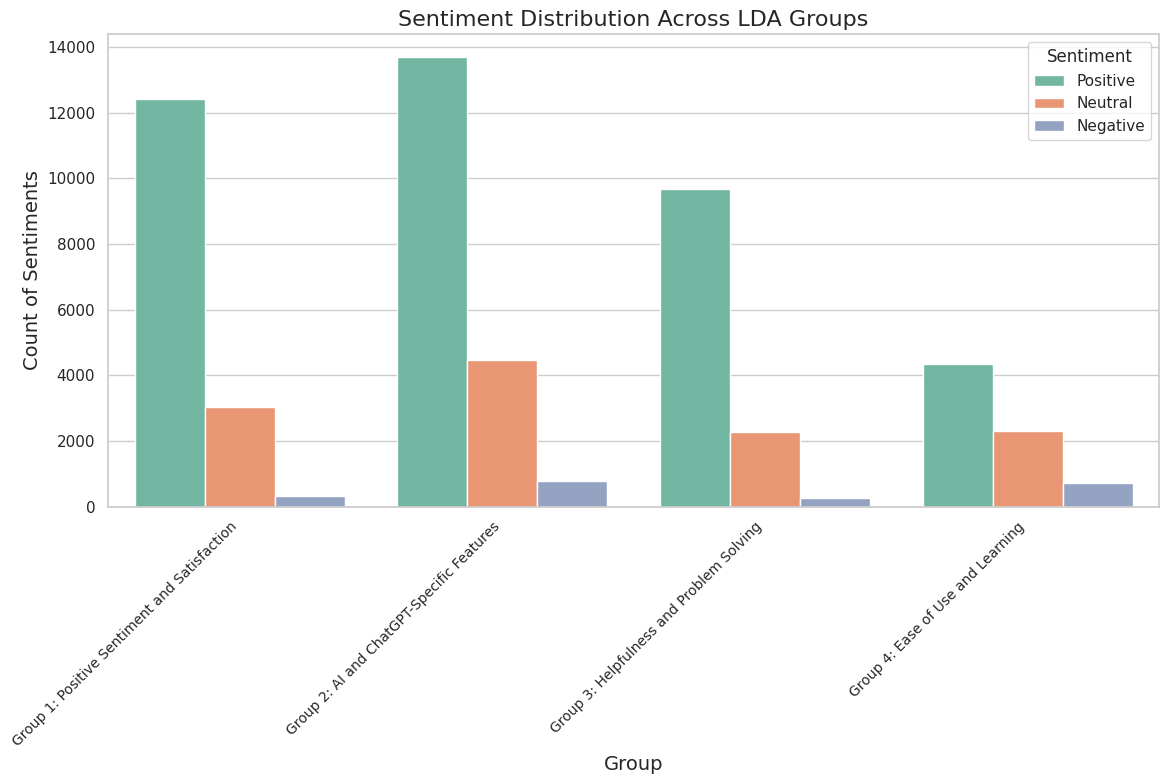

In [ ]:
print(review_groups_output.columns)

# Set up the plot aesthetics
plt.figure(figsize=(12, 8))

review_groups_output['Group Label'] = review_groups_output['Group'].apply(lambda x: f"Group {x}: {group_descriptions[x]}")

review_groups_output = review_groups_output.sort_values(by='Group')

sentiment_order = ['Positive', 'Neutral', 'Negative']

# Create a countplot to visualize sentiment distribution across groups
sns.countplot(data=review_groups_output, x='Group Label', hue='Sentiment', palette='Set2', hue_order=sentiment_order)


# Add labels and title
plt.title('Sentiment Distribution Across LDA Groups', fontsize=16)
plt.xlabel('Group', fontsize=14)
plt.ylabel('Count of Sentiments', fontsize=14)
plt.legend(title='Sentiment', loc='upper right')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


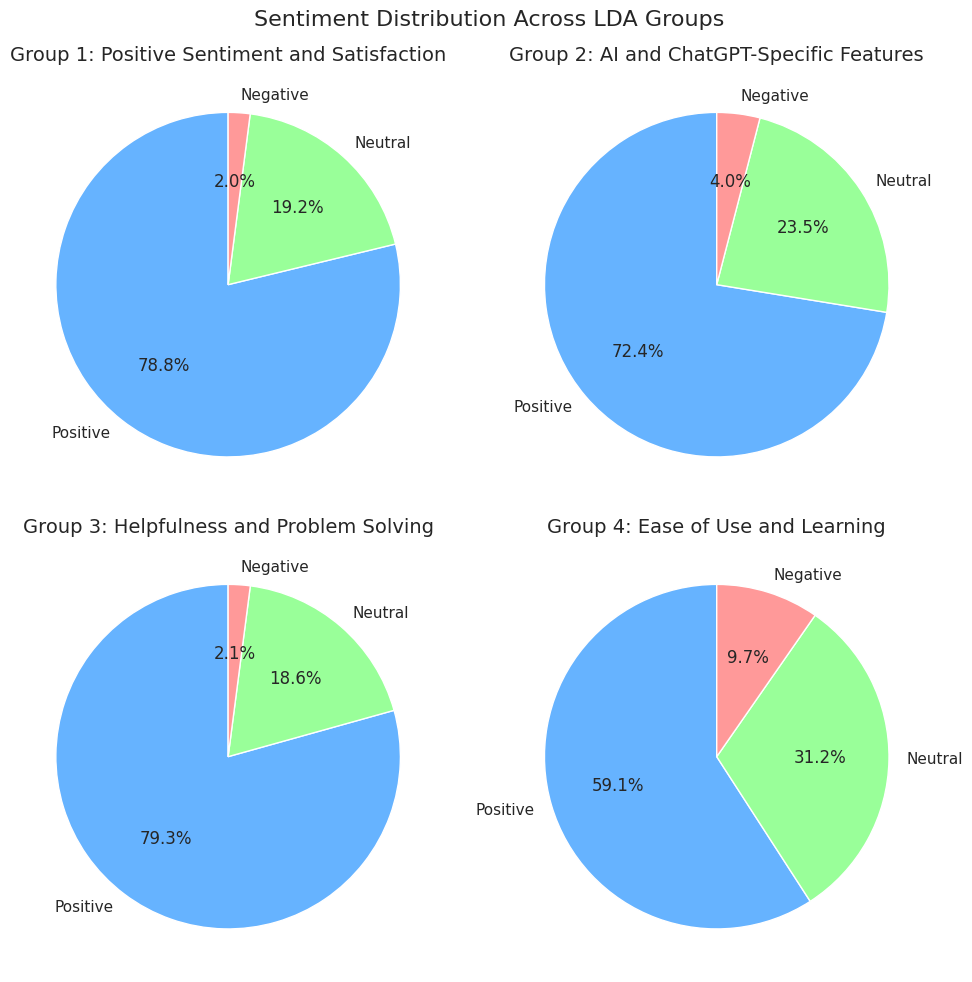

In [ ]:

# Get unique groups
groups = review_groups_output['Group'].unique()

# Define the colors for the pie chart
colors = ['#66b3ff', '#99ff99', '#ff9999']  # For positive, neutral, negative

# Set up the figure for subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Flatten the axes array for easier access
axs = axs.flatten()

# Loop through each group and create a pie chart
for i, group in enumerate(groups):
    # Filter the data for the current group
    group_data = review_groups_output[review_groups_output['Group'] == group]

    # Count the occurrences of each sentiment in the current group
    sentiment_counts = group_data['Sentiment'].value_counts()

    # Create pie chart
    axs[i].pie(sentiment_counts, labels=sentiment_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)

    # Set the title for each pie chart
    axs[i].set_title(f"Group {group}: {group_descriptions[group]}", fontsize=14)

# Add a title for the overall figure
fig.suptitle('Sentiment Distribution Across LDA Groups', fontsize=16)

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
#final csv
review_groups_output.to_csv('final_review_groups_output.csv', index=False)
from google.colab import files
files.download('final_review_groups_output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>